In [117]:
# Data manipulation
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
sns.set_palette("Set2")
plt.rcParams["figure.figsize"] = [13,7]

In [118]:
df = pd.read_csv("dataset/bank-full.csv",sep=";")

In [119]:
df.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
25875,31,technician,married,secondary,no,2420,yes,no,cellular,19,nov,166,1,-1,0,unknown,no
21338,40,management,married,tertiary,no,2935,yes,no,cellular,18,aug,192,2,-1,0,unknown,no
35372,50,management,married,secondary,no,0,yes,yes,cellular,7,may,55,1,-1,0,unknown,no
9322,46,management,married,tertiary,no,625,yes,no,unknown,6,jun,127,1,-1,0,unknown,no
32531,34,services,married,secondary,no,210,yes,yes,cellular,17,apr,175,1,332,1,failure,no


### Questão 1
**Qual profissão tem mais tendência a fazer um empréstimo? De qual tipo?**

In [120]:
# Caso tenha empréstimo, seja pessoal ou imobiliário, a coluna `any_loan` armazena "yes"
df['any_loan'] = df.apply(lambda row: "yes" if ((row['housing']=='yes')or(row['loan']=='yes')) else "no",axis=1)

In [121]:
jobs,percentage_loans = [],[]
# Para cada profissão, armazena-se qual porcentagem de pessoas tem empréstimos
for job,total in zip(df['job'].value_counts().index,df['job'].value_counts().values):
    jobs.append(job)
    count_loans = df[(df['job']=="{}".format(job))&(df['any_loan']=="yes")].shape[0]
    percentage_loans.append(float('{:.2f}'.format((count_loans/total)*100)))

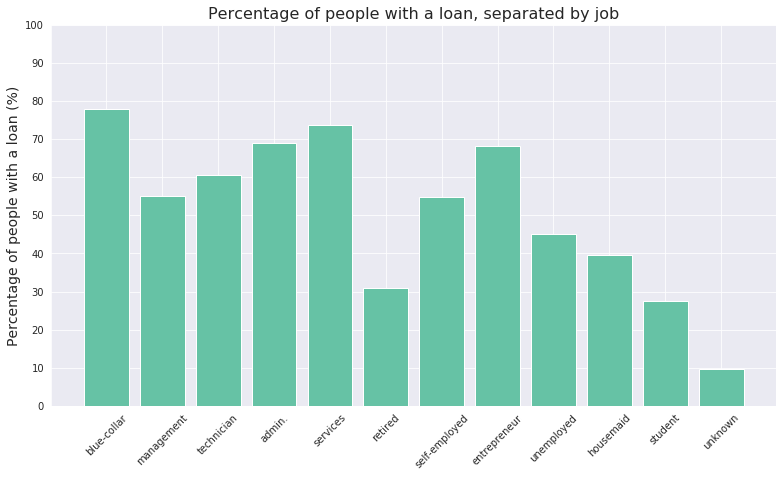

In [122]:
# Gráfico com o percentual de pessoas com empréstimo separado por profissão
plt.bar(range(len(percentage_loans)),percentage_loans)
plt.xticks(range(len(percentage_loans)),jobs,rotation=45)
plt.yticks(range(0,101,10))
plt.ylabel("Percentage of people with a loan (%)",fontsize=14)
plt.title("Percentage of people with a loan, separated by job",fontsize=16)
plt.savefig("images/1_percentageByJob.png")

In [123]:
# Informações que irão compor o Diagrama de Venn do report, respondendo a pergunta "De qual tipo?"
union = df[(df['job']=='blue-collar')&(df['any_loan']=='yes')].shape[0]
personal = df[(df['job']=='blue-collar')&(df['loan']=='yes')&(df['housing']=='no')].shape[0]
housing = df[(df['job']=='blue-collar')&(df['housing']=='yes')&(df['loan']=='no')].shape[0]
intersection = union - (personal + housing)
print("União: {}\nInterseção: {} ({:.2f}%)\nSomente empréstimos pessoais: {} ({:.2f}%)\nSomente empréstimos imobiliários: {} ({:.2f}%)".format(union,intersection,intersection/union*100,personal,personal/union*100,housing,housing/union*100))

União: 7599
Interseção: 1133 (14.91%)
Somente empréstimos pessoais: 551 (7.25%)
Somente empréstimos imobiliários: 5915 (77.84%)


### Questão 2
**Fazendo uma relação entre número de contatos e sucesso da campanha quais
são os pontos relevantes a serem observados?**

In [124]:
# Transforma 'yes' em 1 e 'no' em 0
def binarize(df,list_columns):
    for col in list_columns:
        df[col] = np.where(df[col]=='yes',1,0)

binarize(df,['housing','loan','any_loan','default','y'])

In [125]:
df.corr()['y']

age         0.025155
default    -0.022419
balance     0.052838
housing    -0.139173
loan       -0.068185
day        -0.028348
duration    0.394521
campaign   -0.073172
pdays       0.103621
previous    0.093236
y           1.000000
any_loan   -0.159092
Name: y, dtype: float64

In [126]:
df.corr()['campaign']

age         0.004760
default     0.016822
balance    -0.014578
housing    -0.023599
loan        0.009980
day         0.162490
duration   -0.084570
campaign    1.000000
pdays      -0.088628
previous   -0.032855
y          -0.073172
any_loan   -0.014998
Name: campaign, dtype: float64

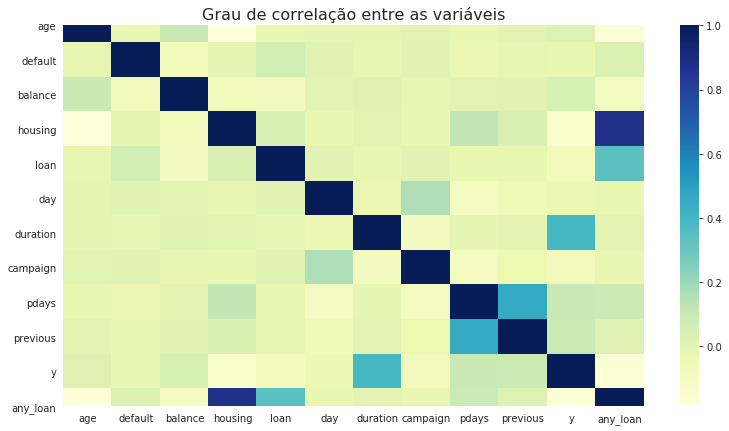

In [127]:
sns.heatmap(df.corr(),cmap="YlGnBu")
plt.title("Grau de correlação entre as variáveis",fontsize=16)
plt.savefig("images/2_heatmapCorr.png")

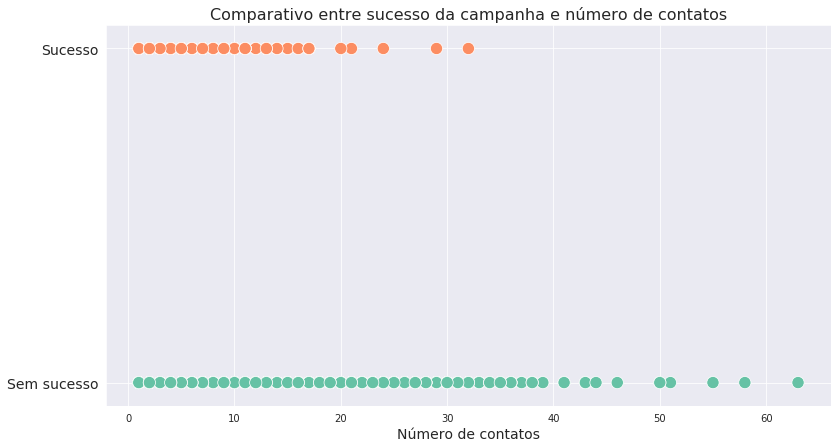

In [128]:
sns.scatterplot(y='y',x='campaign',hue='y',data=df,s=150)
plt.yticks([0,1],['Sem sucesso','Sucesso'],fontsize=14)
plt.ylabel("")
plt.xlabel("Número de contatos",fontsize=14)
plt.title("Comparativo entre sucesso da campanha e número de contatos",fontsize=16)
plt.legend().set_visible(False)
plt.savefig("images/2_scatterSucesso.png")

### Questão 3
**Baseando-se nos resultados de adesão desta campanha qual o número médio e o máximo de ligações que você indica para otimizar a adesão?**

In [129]:
print("Número médio de ligações: {}\nNúmero máximo de ligações: {}\nMediana: {}".format(int(round(df[df['y']==1]['campaign'].mean())),df[df['y']==1]['campaign'].max(),int(df[df['y']==1]['campaign'].median())))

Número médio de ligações: 2
Número máximo de ligações: 32
Mediana: 2


### Questão 4 
**O resultado da campanha anterior tem relevância na campanha atual?**

In [130]:
df.corr()['previous']

age         0.001288
default    -0.018329
balance     0.016674
housing     0.037076
loan       -0.011043
day        -0.051710
duration    0.001203
campaign   -0.032855
pdays       0.454820
previous    1.000000
y           0.093236
any_loan    0.023593
Name: previous, dtype: float64

In [131]:
df['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [135]:
print("Resultado da campanha anterior diferente de 'unknown' corresponde a {:.2f}% do total de observações".format((df[df['poutcome']!='unknown'].shape[0]/df.shape[0])*100))

Resultado da campanha anterior diferente de 'unknown' corresponde a 18.25% do total de observações


In [81]:
# Encoding da coluna `poutcome`
dict_encoding = {"poutcome": {"failure": 0, "success": 1, "other": 2, "unknown": -1}}
df.replace(dict_encoding, inplace=True)

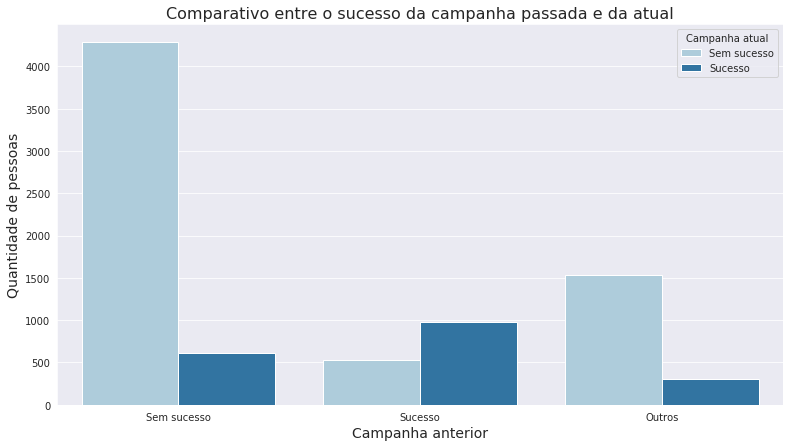

In [111]:
sns.countplot(x='poutcome',hue='y',data=df[df['poutcome']!=-1],palette="Paired")
plt.xticks([0,1,2],['Sem sucesso','Sucesso','Outros'])
plt.xlabel("Campanha anterior",fontsize=14)
plt.ylabel("Quantidade de pessoas",fontsize=14)
plt.title("Comparativo entre o sucesso da campanha passada e da atual",fontsize=16)
plt.legend(title="Campanha atual",labels=['Sem sucesso','Sucesso'])
plt.savefig("4_barCampanhaPassada.png")

### Questão 5 
**Qual o fator determinante para que o banco exija um seguro de crédito?**

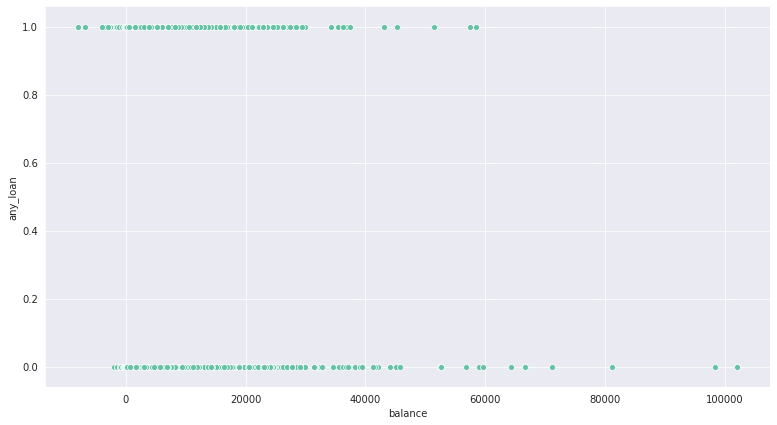

In [144]:
sns.scatterplot(x='balance',data=df,y='any_loan')

### Questão 6 
**Quais são as características mais proeminentes de um cliente que possua empréstimo imobiliário?**